In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/archive.zip" -d "content"

Streaming output truncated to the last 5000 lines.
  inflating: content/data/train/6/28451.png  
  inflating: content/data/train/6/28452.png  
  inflating: content/data/train/6/28467.png  
  inflating: content/data/train/6/28471.png  
  inflating: content/data/train/6/28472.png  
  inflating: content/data/train/6/28478.png  
  inflating: content/data/train/6/2848.png  
  inflating: content/data/train/6/28480.png  
  inflating: content/data/train/6/28484.png  
  inflating: content/data/train/6/28485.png  
  inflating: content/data/train/6/28493.png  
  inflating: content/data/train/6/28499.png  
  inflating: content/data/train/6/28507.png  
  inflating: content/data/train/6/28517.png  
  inflating: content/data/train/6/28519.png  
  inflating: content/data/train/6/28520.png  
  inflating: content/data/train/6/28524.png  
  inflating: content/data/train/6/28530.png  
  inflating: content/data/train/6/28531.png  
  inflating: content/data/train/6/28535.png  
  inflating: content/data/trai

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                        TensorBoard)
from keras.optimizers import Adam
from keras.models import Model
from model import create_model
import cv2
import pickle
import matplotlib.pyplot as plt

In [ ]:
def train():
    log_dir = './log'
    train_dataset_path=r"/content/content/data/train"
    val_dataset_path = r'/content/content/data/val'
    test_dataset_path=r"/content/content/data/test"
    batch_size = 128

    lr = 1e-3
    epochs = 720
    num_classes=7
    train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range = 10,
        zoom_range = 0.1,
        horizontal_flip = True
       )

    train_generator = train_datagen.flow_from_directory(
        directory=train_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True,
        seed=42
    )
    test_datagen = ImageDataGenerator(
        rescale=1 / 255.0,)

    valid_generator = test_datagen.flow_from_directory(

        directory=val_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=42
    )
    test_gen = test_datagen.flow_from_directory(
        directory=test_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=42
    )


    model = create_model(num_classes=num_classes)

    model.summary()
    training_weights='./weights'
    checkpoint_period = ModelCheckpoint(training_weights + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                        monitor='val_loss', save_weights_only=True, save_best_only=False, period=1)
    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
    tensorboard = TensorBoard(log_dir=log_dir)
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics='acc',optimizer=optimizer)
    model_info = model.fit(train_generator,validation_data=valid_generator,
                       epochs=epochs,callbacks=[tensorboard, early_stopping,checkpoint_period]
                       )

    model.evaluate(test_gen,verbose=1)
    model.save('./model.h5')

    # Saving history
    history = {
        'loss': model_info.history['loss'],
        'acc': model_info.history['acc'],
        'val_loss': model_info.history['val_loss'],
        'val_acc': model_info.history['val_acc']
    }
    with open('training_history.pkl', 'wb') as f:
        pickle.dump(history, f)
if __name__ == '__main__':
    train()

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Model: "fer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 256)       2560      
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 512)       1180160   
                                                                 
 batch_normalization_10 (Ba  (None, 48, 48, 512)       2048      
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 512)       0         
 g2D)                                                         

Epoch 1/720
225/225 [==============================] - 22s 85ms/step - loss: 2.0867 - acc: 0.2371 - val_loss: 1.8091 - val_acc: 0.2552
Epoch 2/720
225/225 [==============================] - 19s 83ms/step - loss: 1.7734 - acc: 0.3073 - val_loss: 1.9121 - val_acc: 0.2483
Epoch 3/720
225/225 [==============================] - 19s 83ms/step - loss: 1.5778 - acc: 0.3908 - val_loss: 1.8324 - val_acc: 0.2037
Epoch 4/720
225/225 [==============================] - 19s 85ms/step - loss: 1.4211 - acc: 0.4564 - val_loss: 1.4103 - val_acc: 0.4765
Epoch 5/720
225/225 [==============================] - 19s 85ms/step - loss: 1.3100 - acc: 0.5012 - val_loss: 1.2619 - val_acc: 0.5160
Epoch 6/720
225/225 [==============================] - 19s 84ms/step - loss: 1.2506 - acc: 0.5203 - val_loss: 1.2304 - val_acc: 0.5288
Epoch 7/720
225/225 [==============================] - 19s 84ms/step - loss: 1.2102 - acc: 0.5412 - val_loss: 1.1420 - val_acc: 0.5684
Epoch 8/720
225/225 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


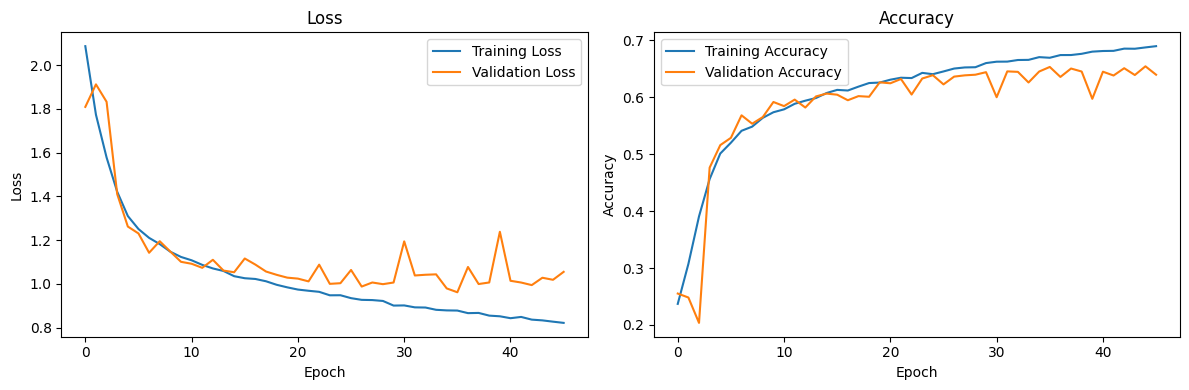

In [ ]:
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['acc'], label='Training Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Perform SVM classifying

In [ ]:
def train():
    log_dir = './log'
    train_dataset_path=r"/content/content/data/train"
    val_dataset_path = r'/content/content/data/val'
    test_dataset_path=r"/content/content/data/test"
    batch_size = 128

    lr = 1e-3
    epochs = 720
    num_classes=7
    train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range = 10,
        zoom_range = 0.1,
        horizontal_flip = True
    )

    train_generator = train_datagen.flow_from_directory(
        directory=train_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True,
        seed=42
    )

    test_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
    )

    valid_generator = test_datagen.flow_from_directory(
        directory=val_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=42
    )

    test_gen = test_datagen.flow_from_directory(
        directory=test_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=42
    )

    # Create and compile the CNN model
    model = create_model(num_classes=num_classes)
    model.summary()

    training_weights='./content/weights'
    checkpoint_period = ModelCheckpoint(training_weights + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                        monitor='val_loss', save_weights_only=True, save_best_only=False, period=1)

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
    tensorboard = TensorBoard(log_dir=log_dir)
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics='acc',optimizer=optimizer)
    model_info = model.fit(train_generator, validation_data=valid_generator,
                           epochs=epochs, callbacks=[tensorboard, early_stopping, checkpoint_period])

    # Save CNN model
    model.save('./model_eval.h5')

    # Saving history
    history = {
        'loss': model_info.history['loss'],
        'acc': model_info.history['acc'],
        'val_loss': model_info.history['val_loss'],
        'val_acc': model_info.history['val_acc']
    }
    with open('training_history_svm.pkl', 'wb') as f:
        pickle.dump(history, f)

if __name__ == '__main__':
    train()

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Model: "fer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 48, 48, 256)       2560      
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 512)       1180160   
                                                                 
 batch_normalization_20 (Ba  (None, 48, 48, 512)       2048      
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 24, 24, 512)       0         
 ng2D)                                                        

Epoch 1/720
225/225 [==============================] - 23s 86ms/step - loss: 2.0727 - acc: 0.2431 - val_loss: 1.9213 - val_acc: 0.2586
Epoch 2/720
225/225 [==============================] - 19s 84ms/step - loss: 1.7381 - acc: 0.3297 - val_loss: 1.6743 - val_acc: 0.3266
Epoch 3/720
225/225 [==============================] - 19s 83ms/step - loss: 1.5549 - acc: 0.4034 - val_loss: 1.4962 - val_acc: 0.4166
Epoch 4/720
225/225 [==============================] - 19s 84ms/step - loss: 1.4054 - acc: 0.4581 - val_loss: 1.4180 - val_acc: 0.4572
Epoch 5/720
225/225 [==============================] - 19s 84ms/step - loss: 1.3109 - acc: 0.4981 - val_loss: 1.2553 - val_acc: 0.5169
Epoch 6/720
225/225 [==============================] - 19s 83ms/step - loss: 1.2588 - acc: 0.5260 - val_loss: 1.2346 - val_acc: 0.5422
Epoch 7/720
225/225 [==============================] - 19s 84ms/step - loss: 1.2158 - acc: 0.5386 - val_loss: 1.2475 - val_acc: 0.5213
Epoch 8/720
225/225 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


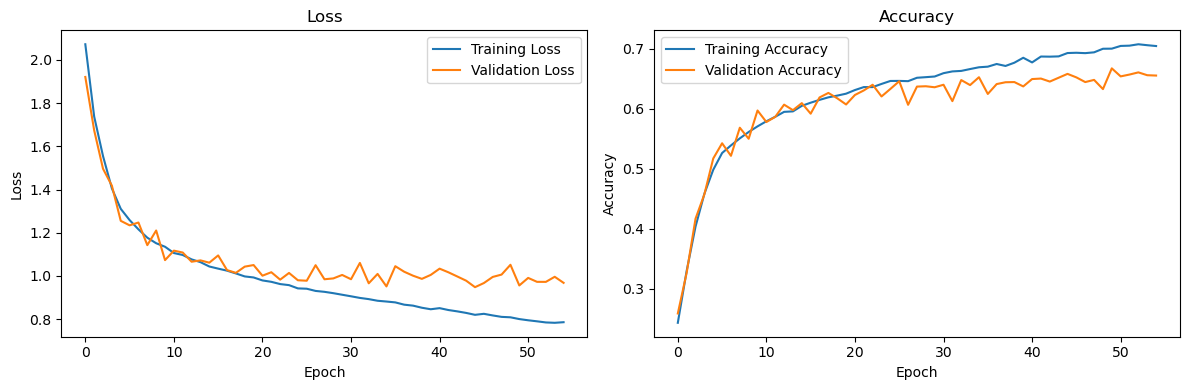

In [3]:
with open('training_history_svm.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['acc'], label='Training Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
import os
import zipfile

# Path to the directory containing .h5 files
directory = "/content/"

# Get a list of all .h5 files in the directory
h5_files = [file for file in os.listdir(directory) if file.endswith(".h5")]

# Specify the name of the zip file
zip_name = "h5_files.zip"

# Create a zip file
with zipfile.ZipFile(zip_name, 'w') as zipf:
    # Add each .h5 file to the zip file
    for file in h5_files:
        zipf.write(os.path.join(directory, file), file)

print("All .h5 files zipped successfully!")

All .h5 files zipped successfully!


In [1]:
from keras.models import load_model

# Load the model
model = load_model('Opt_Model\model_v2.h5')